<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [ ]:
#!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

#### Install the required libraries and import them


In [ ]:
#!pip install pandas

In [ ]:
#!pip install matplotlib

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Connect to the SQLite database


In [2]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [8]:
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)
#print(df)
df.head()


,Unnamed: 0,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,...,0.0,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Easy,65000.0,8.0
1,1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,...,0.0,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Easy,65000.0,8.0
2,2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,...,0.0,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Easy,65000.0,8.0
3,3,4,I am learning to code,18-24 years old,"Student, full-time",Unknown,Apples,Unknown,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Easy,65000.0,8.0
4,4,5,I am a developer by profession,18-24 years old,"Student, full-time",Unknown,Apples,Unknown,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",...,0.0,0.0,0.0,0.0,0.0,0.0,Too short,Easy,65000.0,8.0


**Demo 2: List all tables**


In [4]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [5]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [14]:
df=pd.read_csv(r'D:\My folder\ostad\coursera\Ibm-data-analyst-capstone-project\cleaned_survey_data_v2.csv')

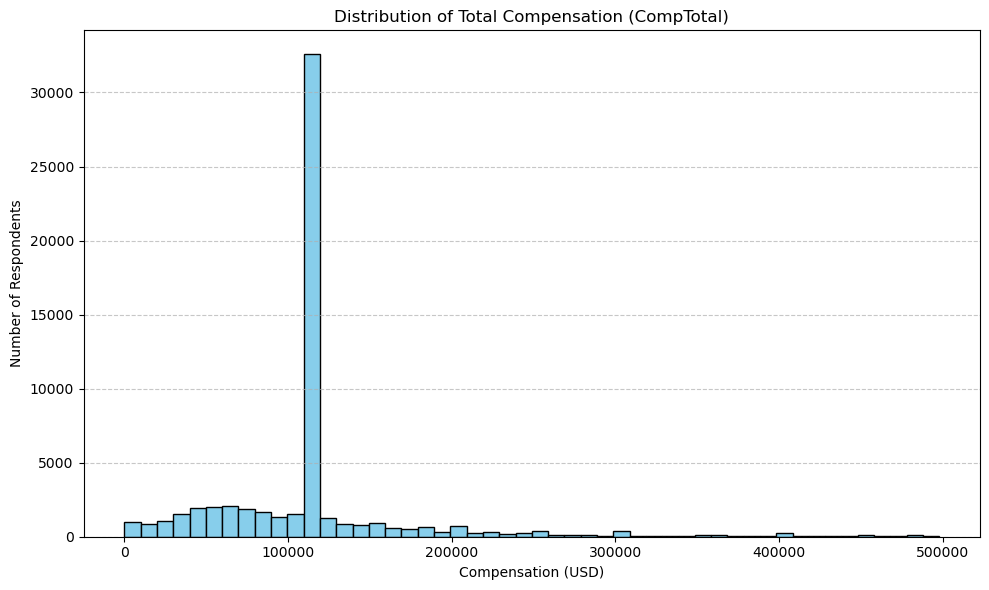

In [20]:
## Write your code here
df_filtered = df[df['CompTotal'] < 500000]
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


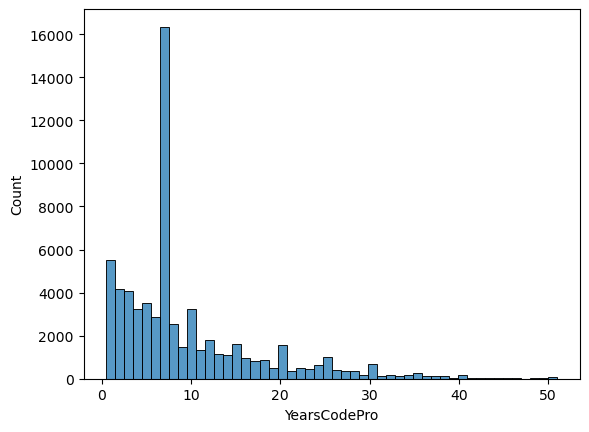

In [21]:
## Write your code here
sns.histplot(data=df,x='YearsCodePro',bins=50)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


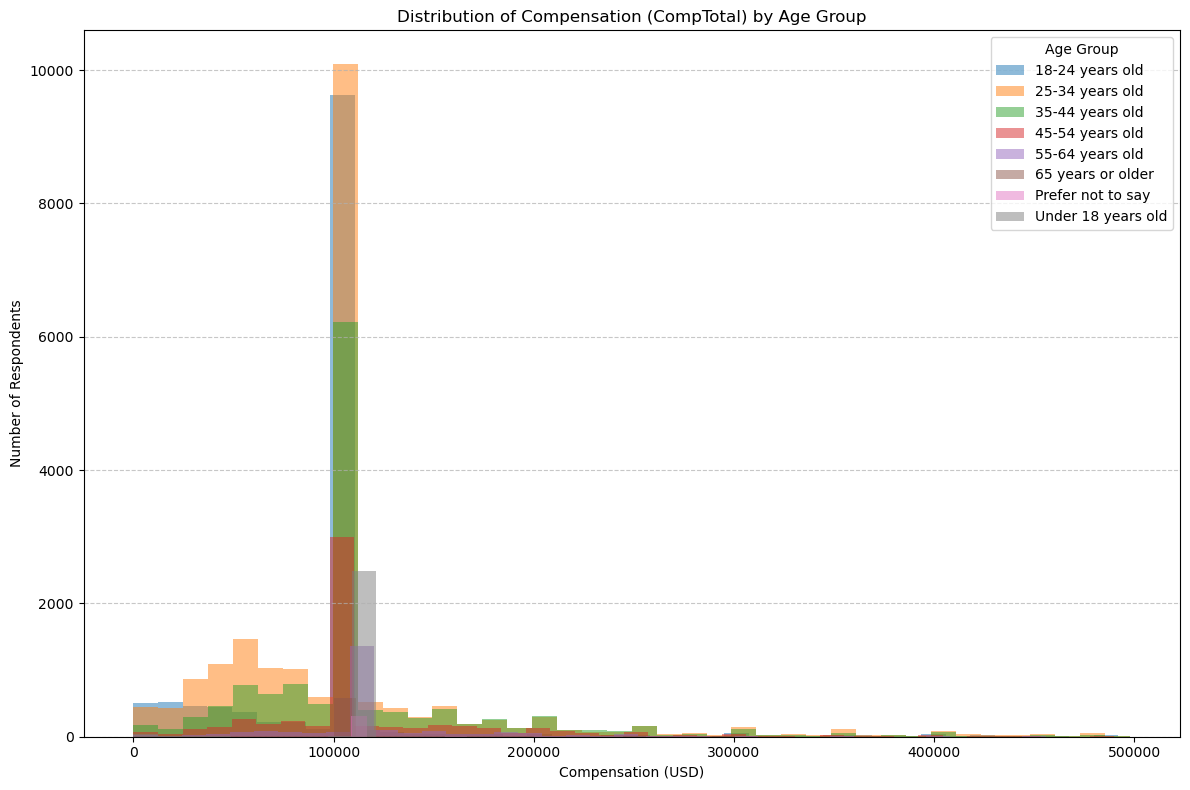

In [23]:
## Write your code here
df = df[df['CompTotal'] < 500000]
age_groups = df['Age'].unique()

# Plot
plt.figure(figsize=(12, 8))

for age in sorted(age_groups):
    group_data = df[df['Age'] == age]['CompTotal']
    plt.hist(group_data, bins=40, alpha=0.5, label=age)

plt.title('Distribution of Compensation (CompTotal) by Age Group')
plt.xlabel('Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


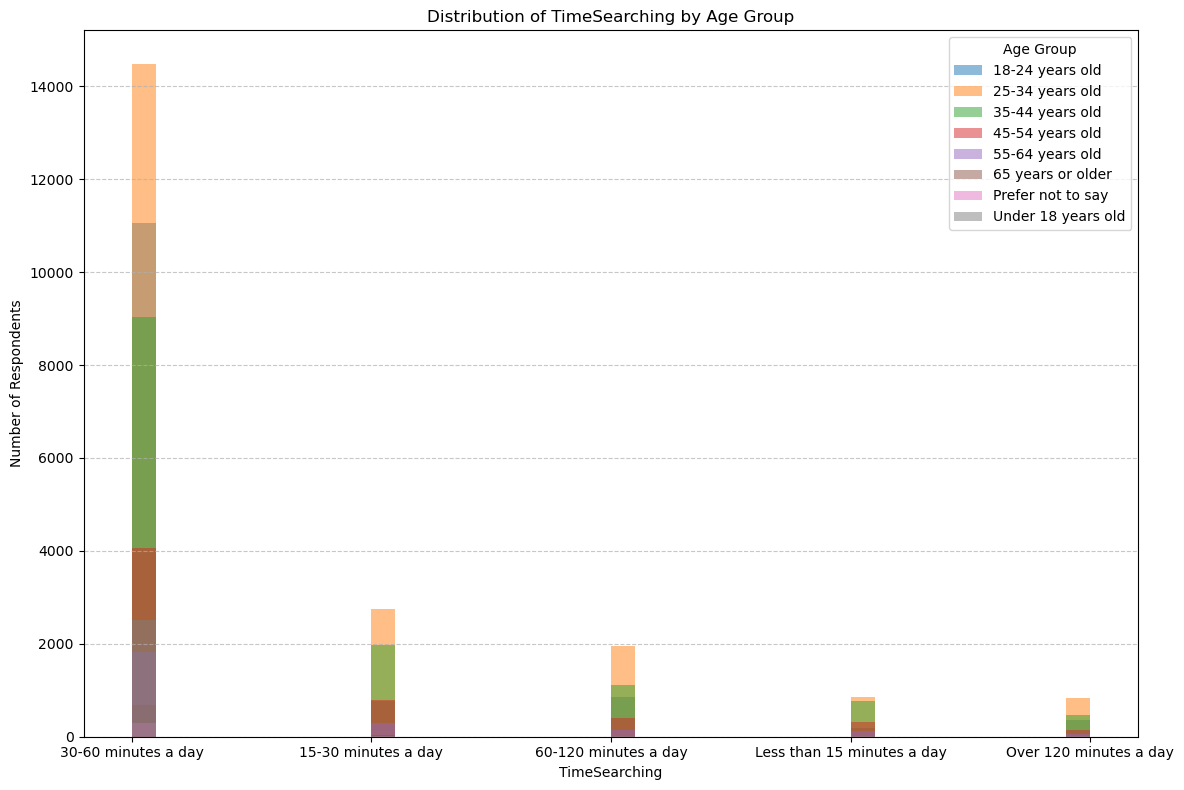

In [24]:
## Write your code here
## Write your code here
#df = df[df['TimeSearching'] < 500000]
age_groups = df['Age'].unique()

# Plot
plt.figure(figsize=(12, 8))

for age in sorted(age_groups):
    group_data = df[df['Age'] == age]['TimeSearching']
    plt.hist(group_data, bins=40, alpha=0.5, label=age)

plt.title('Distribution of TimeSearching by Age Group')
plt.xlabel('TimeSearching')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


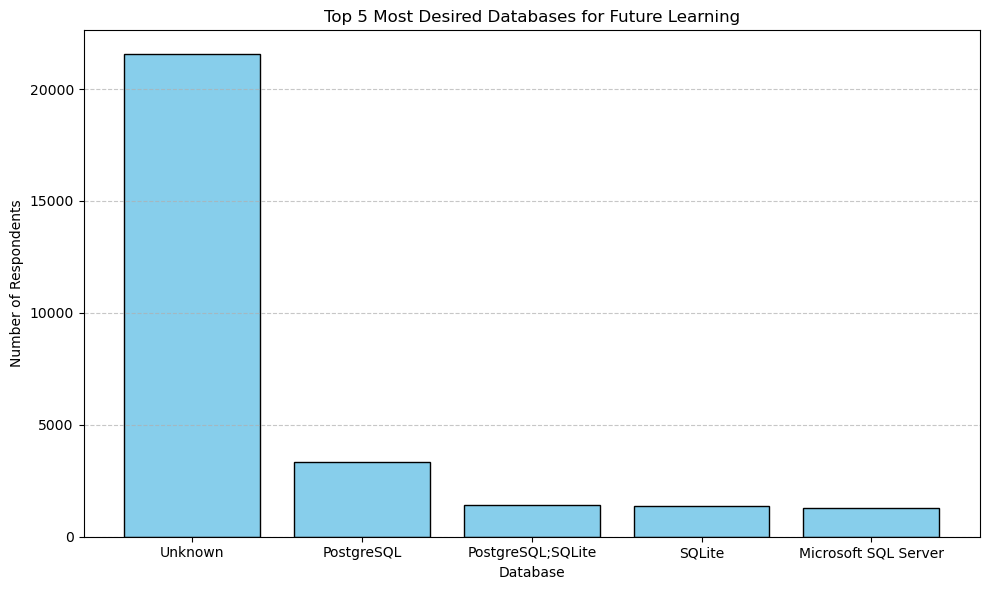

In [26]:
db_series = df['DatabaseWantToWorkWith'].str.split(',').explode().str.strip()

# Count frequency
top_dbs = db_series.value_counts().head(5)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_dbs.index, top_dbs.values, color='skyblue', edgecolor='black')
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


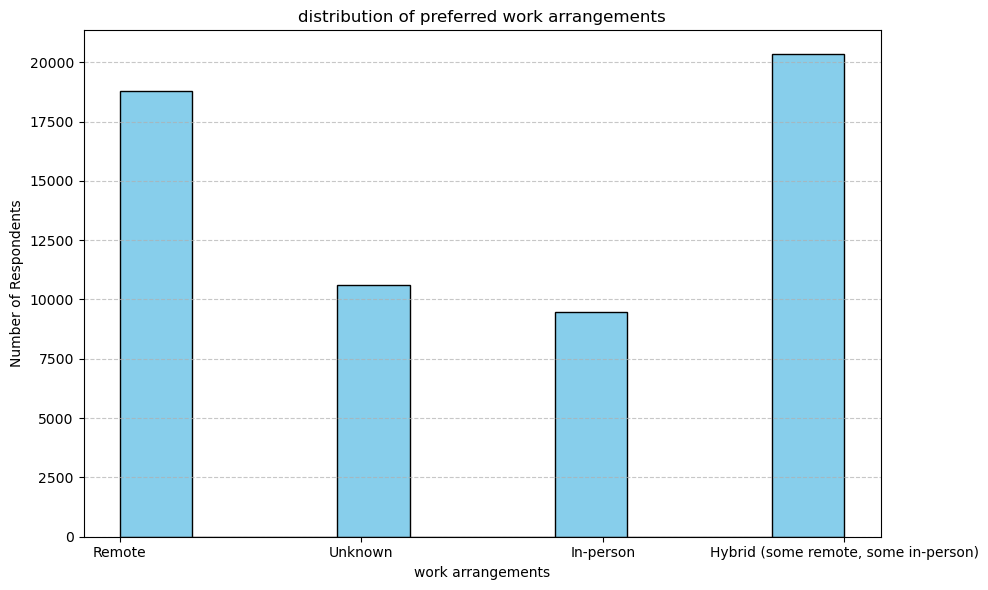

In [28]:
## Write your code here

# Plot
plt.figure(figsize=(10, 6))
plt.hist(df['RemoteWork'], color='skyblue', edgecolor='black')
plt.title('distribution of preferred work arrangements')
plt.xlabel('work arrangements')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


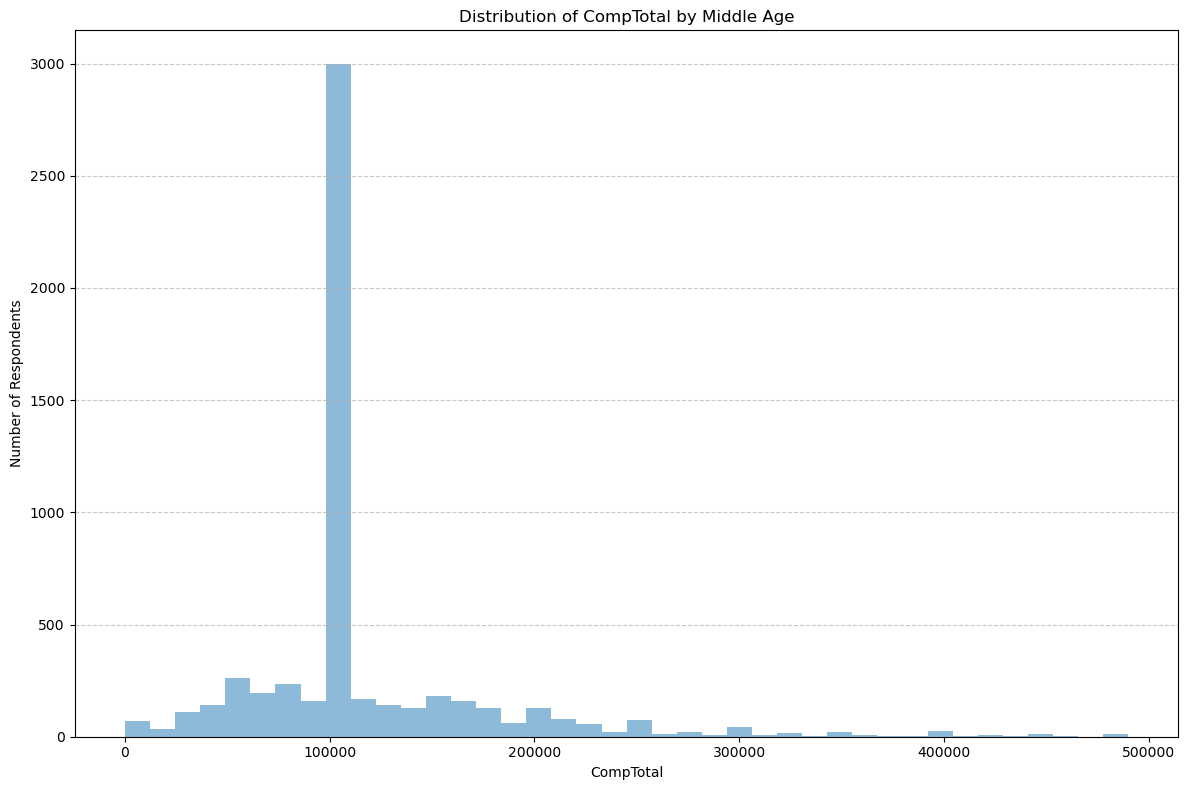

In [34]:
## Write your code here
## Write your code here
## Write your code here
#df = df[df['TimeSearching'] < 500000]
age_45_60 = df[df['Age']=='45-54 years old']
df_filtered = age_45_60[age_45_60['CompTotal'] < 500000]
# Plot
plt.figure(figsize=(12, 8))

plt.hist(df_filtered['CompTotal'], bins=40, alpha=0.5)

plt.title('Distribution of CompTotal by Middle Age')
plt.xlabel('CompTotal')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


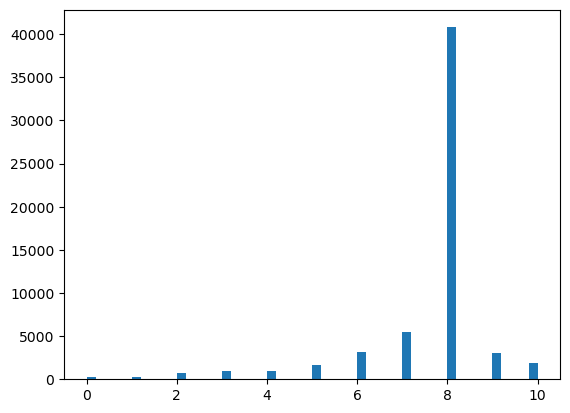

In [36]:
## Write your code here
plt.hist(df['JobSat'],bins=50)
plt.show()

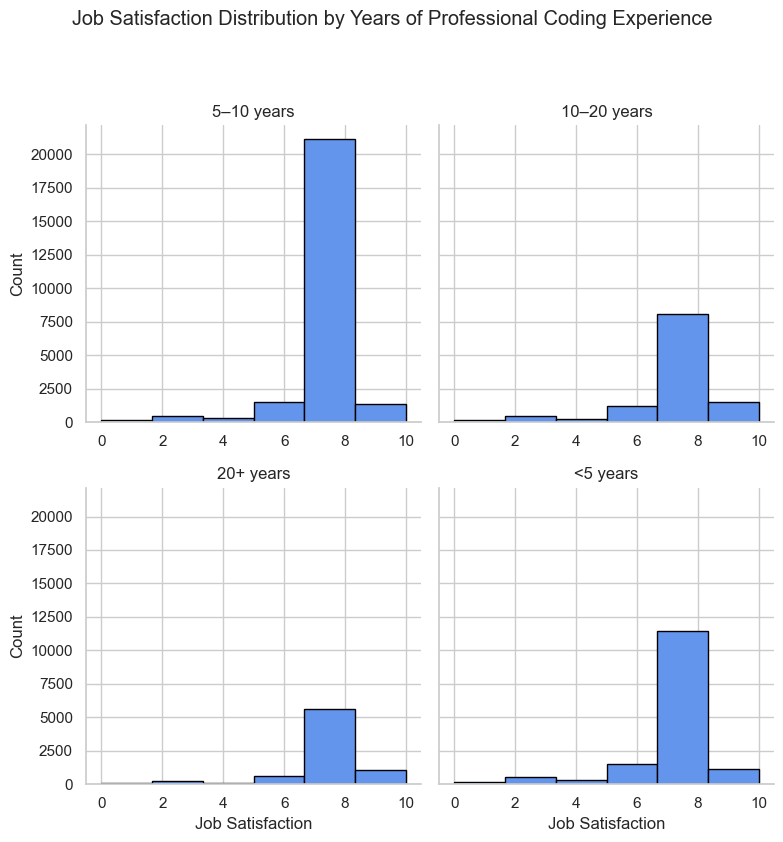

In [37]:


# Drop missing values
df = df[df['JobSat'].notnull() & df['YearsCodePro'].notnull()]

# Optional: Simplify years into buckets
def categorize_years(x):
    try:
        x = float(x)
        if x < 5:
            return '<5 years'
        elif x < 10:
            return '5–10 years'
        elif x < 20:
            return '10–20 years'
        else:
            return '20+ years'
    except:
        return None

df['ExperienceBucket'] = df['YearsCodePro'].apply(categorize_years)

# Filter out None buckets
df = df[df['ExperienceBucket'].notnull()]

# Plot: Faceted histogram of JobSat by experience bucket
sns.set(style='whitegrid')
g = sns.FacetGrid(df, col="ExperienceBucket", col_wrap=2, height=4, sharex=False)
g.map(plt.hist, "JobSat", bins=6, color="cornflowerblue", edgecolor="black")

g.set_titles("{col_name}")
g.set_axis_labels("Job Satisfaction", "Count")
g.fig.suptitle("Job Satisfaction Distribution by Years of Professional Coding Experience", y=1.05)
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [38]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
